### 투입된 약물의 양과 오염양 사이의 관계를 선형회귀로 나타내기
21812167 유다은 10: 선형회귀 과제 (1)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data_home='https://github.com/dknife/ML/raw/main/data/'
po_data=pd.read_csv(data_home+'pollution.csv')
print(po_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


In [2]:
### TD: print from data[10] to data[15]

print(po_data[10:16])

       input  pollution
10  0.206014   4.334919
11  0.150001   5.378262
12  0.392948   3.191317
13  0.420919   2.021181
14  0.330716   4.245457
15  0.481756   3.735627


In [3]:
input_min=po_data['input'].min()
input_max=po_data['input'].max()
print(input_min,input_max)

po_min=po_data['pollution'].min()
po_max=po_data['pollution'].max()

0.0006637621949165 0.4849026075901378


In [4]:
def hypothesis_line(x,w,b):
  return w*x+b

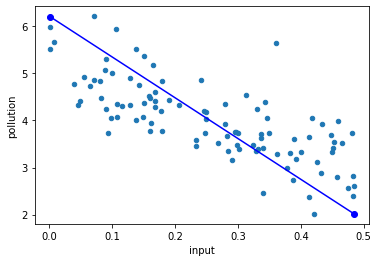

In [5]:
w=-(po_max-po_min)/(input_max-input_min)
b=po_max
po_data.plot(kind='scatter',x='input',y='pollution')

plt.plot([input_min,input_max],[hypothesis_line(input_min,w,b),
                                hypothesis_line(input_max,w,b)],'bo-')

plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X=po_data['input'].to_numpy()
y=po_data['pollution'].to_numpy()
print("X.shape={},y.shape={}".format(X.shape,y.shape))

X.shape=(100,),y.shape=(100,)


In [7]:
X=X.reshape(100,1)
y=y.reshape(100,1)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [11]:
lr_w=linear_reg.coef_.item() #기울기
lr_b=linear_reg.intercept_.item() #절편

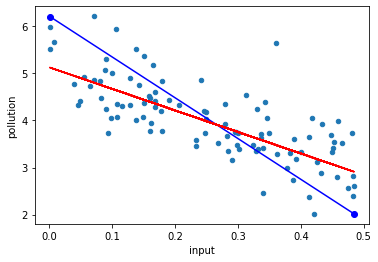

In [32]:
po_data.plot(kind='scatter',x='input',y='pollution')
plt.plot([input_min,input_max],[hypothesis_line(input_min,w,b),
                                hypothesis_line(input_max,w,b)],'bo-')
plt.plot(X_train,lr_w*X_train+lr_b,'r-')

In [20]:
Train_score=linear_reg.score(X_train,y_train)
Test_score=linear_reg.score(X_test,y_test)
print("Train=",Train_score)
print("Test=",Test_score)

Train= 0.5891753953657519
Test= 0.3726714175063077


train 시킨 score의 값이 test 시킨 score 값보다 약 1.6배보다 높게 나왔다.
성능이 좀 떨어진다는 것을 알 수 있다. 그리고 투입된 약물의 양이 많을수록 오염양이 적다는 것을 알 수 있다. 하지만 test 값보다 train 값에서 투입된 약물의 양이 많을 때 오염양이 더 높게 나타나는 것을 확인할 수 있다.
